# 1. Library Import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

# 2. 데이터 불러오기 및 확인

In [5]:
df_hitter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/hitter_salary_debut.csv')

In [6]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      535 non-null    int64  
 1   선수명     535 non-null    object 
 2   팀명      535 non-null    object 
 3   AVG     535 non-null    float64
 4   G       535 non-null    int64  
 5   PA      535 non-null    int64  
 6   AB      535 non-null    int64  
 7   R       535 non-null    int64  
 8   H       535 non-null    int64  
 9   2B      535 non-null    int64  
 10  3B      535 non-null    int64  
 11  HR      535 non-null    int64  
 12  TB      535 non-null    int64  
 13  RBI     535 non-null    int64  
 14  SAC     535 non-null    int64  
 15  SF      535 non-null    int64  
 16  BB      535 non-null    int64  
 17  IBB     535 non-null    int64  
 18  HBP     535 non-null    int64  
 19  SO      535 non-null    int64  
 20  GDP     535 non-null    int64  
 21  SLG     535 non-null    float64
 22  OB

In [7]:
df = df_hitter.drop( ['연도','순위','선수명','팀명'] ,axis=1)


In [8]:
df.describe()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,SLG,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,...,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,0.242138,84.489720,275.267290,240.028037,34.022430,64.385047,11.022430,1.022430,5.332710,93.450467,...,0.344854,0.318148,0.663002,16.115888,0.242198,0.214473,25025.663551,1.406336,25481.738318,8.545794
std,0.068091,43.120068,199.317472,173.470656,27.689684,51.973392,9.892278,1.653354,7.004918,78.296427,...,0.112050,0.071765,0.172363,14.922824,0.108728,0.238355,42212.847498,1.920611,37783.821164,5.321258
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2700.000000,-2.480000,3000.000000,1.000000
25%,0.215500,47.000000,85.500000,74.000000,10.000000,17.000000,2.000000,0.000000,0.000000,22.000000,...,0.285500,0.289000,0.590500,3.000000,0.200000,0.000000,3400.000000,-0.040000,4500.000000,4.000000
50%,0.251000,92.000000,258.000000,224.000000,28.000000,54.000000,9.000000,0.000000,3.000000,79.000000,...,0.355000,0.327000,0.684000,12.000000,0.260000,0.182000,7200.000000,0.610000,9000.000000,8.000000
75%,0.284000,123.000000,463.500000,406.000000,53.000000,110.500000,18.000000,1.000000,7.000000,153.500000,...,0.412500,0.362000,0.765500,27.000000,0.305500,0.333000,26000.000000,2.570000,30000.000000,12.000000
max,0.750000,144.000000,651.000000,570.000000,115.000000,192.000000,46.000000,11.000000,35.000000,313.000000,...,1.000000,0.750000,1.750000,59.000000,1.000000,1.000000,270000.000000,7.910000,270000.000000,24.000000


# 3. EDA

In [9]:
df.corr()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,SLG,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차
AVG,1.000000,0.491600,0.527919,0.531489,0.539856,0.584998,0.534176,0.321527,0.342677,0.561367,...,0.835248,0.846183,0.895292,0.581834,0.553593,0.226074,0.267892,0.525961,0.304485,0.267491
G,0.491600,1.000000,0.924195,0.922525,0.859538,0.883963,0.805955,0.445022,0.575202,0.861784,...,0.491785,0.520230,0.536301,0.828226,0.396298,0.215755,0.422377,0.682182,0.490235,0.462417
PA,0.527919,0.924195,1.000000,0.998334,0.941981,0.980582,0.904257,0.498352,0.661344,0.963712,...,0.549704,0.545380,0.584424,0.948214,0.424989,0.217472,0.513550,0.787018,0.580741,0.457188
AB,0.531489,0.922525,0.998334,1.000000,0.938893,0.983423,0.906140,0.506084,0.656593,0.964887,...,0.550143,0.532736,0.579445,0.951332,0.426099,0.215663,0.506033,0.775762,0.572433,0.451116
R,0.539856,0.859538,0.941981,0.938893,1.000000,0.951464,0.882933,0.570530,0.671097,0.947356,...,0.574341,0.557211,0.605366,0.937351,0.417215,0.236487,0.505537,0.839367,0.579187,0.381505
H,0.584998,0.883963,0.980582,0.983423,0.951464,1.000000,0.926771,0.522293,0.652577,0.978104,...,0.586696,0.568348,0.618035,0.984115,0.450605,0.230970,0.515390,0.827826,0.579776,0.430630
2B,0.534176,0.805955,0.904257,0.906140,0.882933,0.926771,1.000000,0.392009,0.668940,0.937637,...,0.600710,0.527192,0.610009,0.920869,0.420500,0.215324,0.517121,0.785100,0.558320,0.429303
3B,0.321527,0.445022,0.498352,0.506084,0.570530,0.522293,0.392009,1.000000,0.121756,0.471140,...,0.262301,0.278236,0.286362,0.509867,0.220893,0.139580,0.123584,0.495458,0.241643,0.027767
HR,0.342677,0.575202,0.661344,0.656593,0.671097,0.652577,0.668940,0.121756,1.000000,0.791241,...,0.627253,0.377284,0.564849,0.641632,0.283751,0.211814,0.548539,0.639106,0.612406,0.408235
TB,0.561367,0.861784,0.963712,0.964887,0.947356,0.978104,0.937637,0.471140,0.791241,1.000000,...,0.644779,0.556893,0.651024,0.963352,0.437728,0.243269,0.559900,0.841167,0.629972,0.450836


<Axes: >

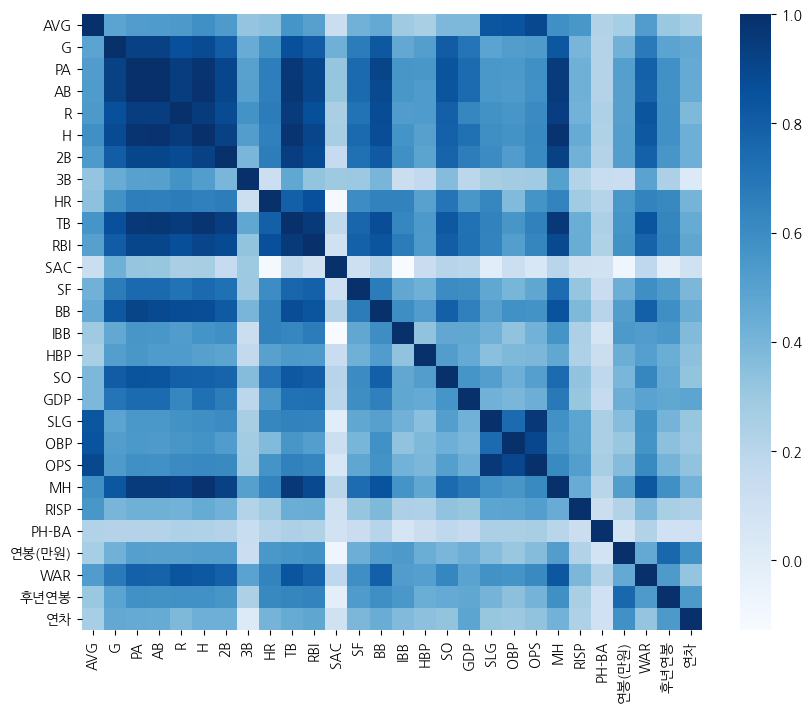

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues')

<Axes: >

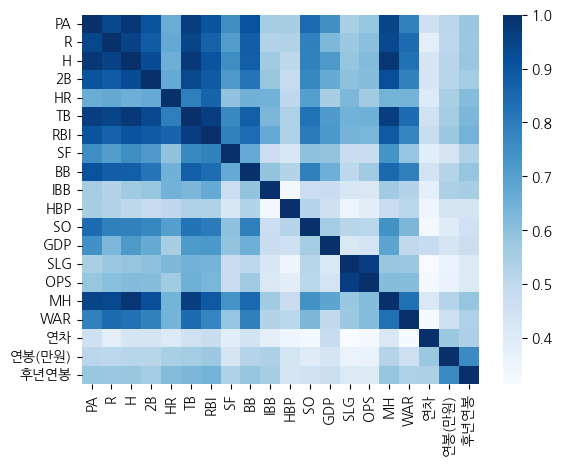

In [11]:
df_corr = df[['PA','R','H','2B','HR','TB','RBI','SF','BB','IBB','HBP','SO','GDP','SLG','OPS','MH','WAR','연차','연봉(만원)','후년연봉']]
sns.heatmap(df_corr.corr(),cmap='Blues')

# 4. 모델링

In [13]:
df_hitter

,순위,선수명,팀명,AVG,G,PA,AB,R,H,2B,...,OBP,OPS,MH,RISP,PH-BA,연도,연봉(만원),WAR,후년연봉,연차
0,8,강민호,삼성,0.287,119,393,355,46,102,14,...,0.349,0.836,26,0.303,0.143,2020,125000,3.11,50000,17
1,4,강민호,삼성,0.291,123,462,406,55,118,22,...,0.361,0.839,34,0.250,0.250,2021,50000,3.91,60000,18
2,13,강민호,삼성,0.258,130,444,396,38,102,19,...,0.330,0.739,19,0.287,0.400,2022,60000,0.51,60000,19
3,4,강민호,삼성,0.290,125,495,434,60,126,19,...,0.366,0.811,32,0.301,0.000,2023,60000,2.61,40000,20
4,2,강백호,KT,0.330,129,574,500,95,165,36,...,0.411,0.955,48,0.320,0.500,2020,21000,5.81,31000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,20,황성빈,롯데,0.212,74,191,170,22,36,5,...,0.268,0.533,10,0.244,0.200,2023,7200,0.40,7600,2
531,3,황재균,KT,0.312,134,600,541,108,169,35,...,0.370,0.882,49,0.324,0.500,2020,120000,5.70,80000,15
532,5,황재균,KT,0.291,117,507,453,74,132,16,...,0.358,0.760,37,0.289,0.000,2021,80000,2.93,40000,16
533,9,황재균,KT,0.262,141,581,519,59,136,25,...,0.335,0.715,36,0.303,0.000,2022,40000,1.86,100000,17


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AVG     535 non-null    float64
 1   G       535 non-null    int64  
 2   PA      535 non-null    int64  
 3   AB      535 non-null    int64  
 4   R       535 non-null    int64  
 5   H       535 non-null    int64  
 6   2B      535 non-null    int64  
 7   3B      535 non-null    int64  
 8   HR      535 non-null    int64  
 9   TB      535 non-null    int64  
 10  RBI     535 non-null    int64  
 11  SAC     535 non-null    int64  
 12  SF      535 non-null    int64  
 13  BB      535 non-null    int64  
 14  IBB     535 non-null    int64  
 15  HBP     535 non-null    int64  
 16  SO      535 non-null    int64  
 17  GDP     535 non-null    int64  
 18  SLG     535 non-null    float64
 19  OBP     535 non-null    float64
 20  OPS     535 non-null    float64
 21  MH      535 non-null    int64  
 22  RI

In [22]:
X_train

,H,HR,TB,RBI,WAR,연차,연봉(만원)
252,45,7,70,24,-0.28,5,3500
124,25,4,42,15,0.91,9,6500
154,17,6,37,13,0.90,6,5000
385,85,17,157,50,2.98,14,20000
59,53,5,77,25,-0.03,7,9000
...,...,...,...,...,...,...,...
70,123,5,162,47,3.06,12,25000
277,41,1,52,19,0.61,10,9200
9,117,10,177,62,3.56,10,11500
359,51,1,65,16,1.43,7,6000


In [20]:
data

,H,HR,TB,RBI,WAR,연차,연봉(만원)
0,102,19,173,61,3.11,17,125000
1,118,18,194,67,3.91,18,50000
2,102,13,162,66,0.51,19,60000
3,126,16,193,77,2.61,20,60000
4,165,23,272,89,5.81,3,21000
...,...,...,...,...,...,...,...
530,36,0,45,8,0.40,2,7200
531,169,21,277,97,5.70,15,120000
532,132,10,182,56,2.93,16,80000
533,136,10,197,64,1.86,17,40000


## 4.1 다중공선성

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyBIF(X):
  vif = pd.DataFrame()
  vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                        for i in range(X.shape[1])]
  vif['Feature'] = X.columns
  return vif

data = df[['H','HR','WAR','연차','연봉(만원)','OPS']]

vif = feature_engineering_XbyBIF(data)

print(vif)

   VIF_Factor Feature
0    9.708836       H
1    3.285710      HR
2    5.130863     WAR
3    5.471687      연차
4    2.526727  연봉(만원)
5    5.979928     OPS


## 4.2 Data Scaling

In [40]:
from sklearn.model_selection import train_test_split

data = df[['H','HR','WAR','연차','연봉(만원)','OPS']]
target = df['후년연봉']

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.3,
    random_state=0
)

In [41]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

## 4.3 RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
model = rf.fit(X_train,y_train)

In [43]:
pred = model.predict(X_test)


In [44]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'MSE : {mse} \nRMSE: {rmse} \nR Square : {r2}')

MSE : 326639791.11354035 
RMSE: 18073.178777225115 
R Square : 0.7206059638905504


In [47]:
import pandas as pd
import statsmodels.api as sm

model = sm.OLS(target, data)

results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   후년연봉   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              281.5
Date:                Fri, 30 Aug 2024   Prob (F-statistic):                   4.45e-161
Time:                        08:48:18   Log-Likelihood:                         -6114.3
No. Observations:                 535   AIC:                                  1.224e+04
Df Residuals:                     529   BIC:                                  1.227e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
H, HR, TB,SO,WAR,MH,연차,연봉(만원)